# Tutorial

<b>Warning: it is necessary to use <u>setups='sg15'</u> in GPAW</b> (ONCV pseudopotentials)

In [17]:
from gpaw import GPAW, FermiDirac
from gpaw.wavefunctions.pw import PW
from ase.io import read
from TDDFT import TDDFT
import numpy as np
from tqdm import tqdm
from ase.units import Hartree, Bohr
import matplotlib.pyplot as plt
%matplotlib inline

c = 20
PW_cut=600
nbands=20
atoms = read('hBN.cif')
atoms.cell[2,2]=c
atoms.center()

calc = GPAW(mode=PW(PW_cut),xc='PBE',
            kpts={'size': (8, 8, 1), 'gamma': True},
            setups='sg15',nbands=nbands*2,
            occupations=FermiDirac(0.0001),
            convergence={'bands':nbands},
            txt='calc.txt')

atoms.set_calculator(calc)
atoms.get_potential_energy()
calc.write('gs_sg15.gpw')

# Initialization 

In [2]:
from TDDFT import TDDFT
tddft=TDDFT(calc,nbands=20)

100%|██████████| 10/10 [00:05<00:00,  2.48it/s]


# Calculation of the dipole matrix
Сalculation of the dipole matrix occurs according to the following equation
$$ d_{nm}(k)=\int_\Omega dr \; u_{kn}^{*}(r) \; r \; u_{km}(r)$$
where $u_{kn}(r)$ - periodic part of Kohn-Sham wavefunction which is stored in <b>TDDFT.ukn</b>

$r$ - coordinate inside the elementary cell which is stored in <b>TDDFT.r</b>

$\Omega$ - volume of the elementary cell which is stored in <b>TDDFT.volume</b>

In [3]:
import matplotlib.pyplot as plt

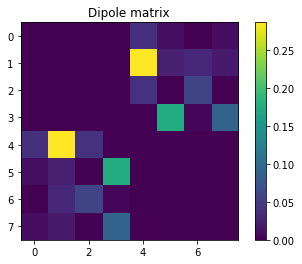

In [4]:
direction=[0,0,1]
dipole=tddft.get_transition_matrix(direction)
plt.title("Dipole matrix")
plt.imshow(np.abs(np.sum(tddft.wk[:,None,None]*dipole,axis=0)))
plt.colorbar()

# TDDFT

In [13]:
dt=0.1;steps=10000;
E=np.zeros(steps);
time=np.arange(steps)*dt
E=10e-2*np.exp(-(time-100)**2/dt)
result=tddft.propagate(dt=dt,steps=steps,E=E,direction=[1,0,0])

100%|██████████| 9999/9999 [00:43<00:00, 227.79it/s]


In [14]:
spectrum=np.fft.fft(tddft.polarization)
freq = np.fft.fftfreq(steps, d=dt)*2*np.pi*Hartree
spectrum=spectrum[np.argsort(freq)]
freq=np.sort(freq)
spectrum=np.abs(spectrum*freq)**2

In [15]:
from scipy.ndimage.filters import gaussian_filter1d

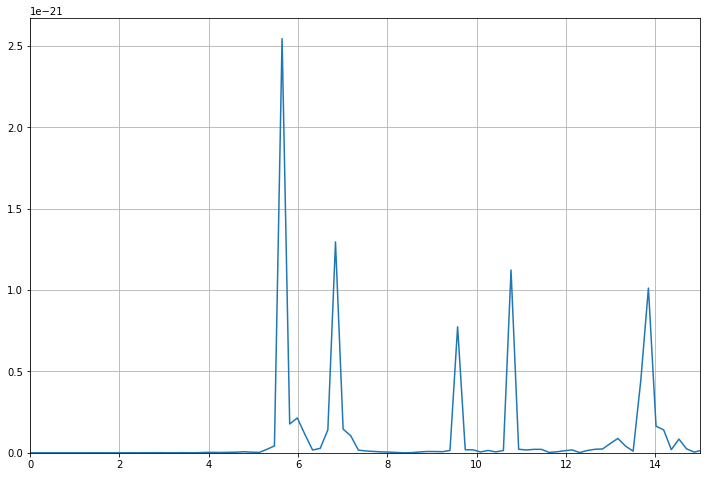

In [16]:
plt.figure(figsize=(12,8))
# plt.plot(omega*Hartree,epsilon.imag)
plt.plot(freq,gaussian_filter1d(spectrum,0.1),'-')
# plt.plot(data[inds_w, 0], 4 * np.pi * data[inds_w, 4],label='real')
# plt.legend(loc='best')
plt.xlim([0,15])
plt.ylim([0,None])
plt.grid()
plt.savefig('spectrum_.png')